In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from model import proxy_crm_modules as pCRM
from pywaterflood import CrmCompensated

import time

In [2]:
np.set_printoptions(threshold=np.inf)

<h3><b>1. Data Preprocessing</b></h3>
<p>Here, we process data for better understanding of the structure and plan out the things we need to do toward the data. P2 and P4 are modified to replicate shut in condition.</p>

In [3]:
# Base case.
data_src = "https://github.com/leleony/proxy_crm/raw/master/data/test/"
oil_prod = pd.read_excel(data_src + 'Base_PROD.xlsx', header=None)
prod = pd.read_excel(data_src + "Base_LIQUID.xlsx", header=None)
inj = pd.read_excel(data_src + "Base_INJ.xlsx", header=None)
t = pd.read_excel(data_src + "TIME.xlsx", header= None)
pressure = pd.read_excel(data_src + "Base_BHP.xlsx", header=None)
wor = pd.read_excel(data_src + "Base_WOR.xlsx", header=None)
cwi = pd.read_excel(data_src + "Base_CWI.xlsx", header=None)

train_size = int(0.75 * prod.shape[0])

<p>This section is for loading the one and two well shut-in cases.</p>

In [4]:
# Single well shut-in case.
prod_shut_in1 = pd.read_excel(data_src + "ShutIn1_LIQUID.xlsx", header= None)
oil_prod_shut_in1 = pd.read_excel(data_src + 'ShutIn1_PROD.xlsx', header=None)
inj_shut_in1 = pd.read_excel(data_src + "ShutIn1_INJ.xlsx", header=None)
pressure_shut_in1 = pd.read_excel(data_src + "ShutIn1_BHP.xlsx", header=None)
wor_shut_in1 = pd.read_excel(data_src + "ShutIn1_WOR.xlsx", header=None)
cwi_shut_in1 = pd.read_excel(data_src + "ShutIn1_CWI.xlsx", header=None)

# Two well shut-in case
prod_shut_in2 = pd.read_excel(data_src + "ShutIn2_PROD.xlsx", header= None)
oil_prod_shut_in2 = pd.read_excel(data_src + 'ShutIn2_PROD.xlsx', header=None)
inj_shut_in2 = pd.read_excel(data_src + "ShutIn2_INJ.xlsx", header=None)
pressure_shut_in2 = pd.read_excel(data_src + "ShutIn2_BHP.xlsx", header=None)
wor_shut_in2 = pd.read_excel(data_src + "ShutIn2_WOR.xlsx", header=None)
cwi_shut_in2 = pd.read_excel(data_src + "ShutIn2_CWI.xlsx", header=None)

<p>Now, we can split it into train-test data. It is divided into 75-25%</p>

In [5]:
#Create train-test dataset for base case.
inj_train = inj.values[1:train_size]
prod_train = prod.values[1:train_size]
oil_prod_train = oil_prod.values[1:train_size]
time_train = t.values[1:train_size].astype('float')
press_train = pressure.values[1:train_size]

inj_test = inj.values[train_size:]
prod_test = prod.values[train_size:]
oil_prod_test = oil_prod.values[train_size:]
time_test = t.values[train_size:].astype('float')
press_test = pressure.values[train_size:]

# for single well shut-in case.
inj_shut_in1_train = inj_shut_in1.values[1:train_size]
prod_shut_in1_train = prod_shut_in1.values[1:train_size]
oil_prod_shut_in1_train = oil_prod_shut_in1.values[1:train_size]
press_shut_in1_train = pressure_shut_in1.values[1:train_size]

inj_shut_in1_test = inj_shut_in1.values[train_size:]
prod_shut_in1_test = prod_shut_in1.values[train_size:]
oil_prod_shut_in1_test = oil_prod_shut_in1.values[train_size:]
press_shut_in1_test = pressure_shut_in2.values[train_size:]

# for two well shut-in case.
inj_shut_in2_train = inj_shut_in2.values[1:train_size]
prod_shut_in2_train = prod_shut_in2.values[1:train_size]
oil_prod_shut_in2_train = oil_prod_shut_in2.values[1:train_size]
press_shut_in2_train = pressure_shut_in2.values[1:train_size]

inj_shut_in2_test = inj_shut_in2.values[train_size:]
prod_shut_in2_test = prod_shut_in2.values[train_size:]
oil_prod_shut_in2_test = oil_prod_shut_in2.values[train_size:]
press_shut_in2_test = pressure_shut_in2.values[train_size:]

<h3><b>2A. Fitting Model - Base Case</b></h3>
<p>Now, let us start with base case, where there is no shut-in well.</p>

In [6]:
base_pcrm = pCRM.proxyCRM()

In [7]:
start_time = time.time()
base_pcrm.fit(oil_prod_train, inj_train, press_train, time_train[:,0], ftol=1e-3)
print("=" * 20)
print("--- %s seconds ---" % (time.time() - start_time))

[      fun: 12.525754300637955
 hess_inv: <36x36 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.52555266e+00,  1.30447120e+00,  1.27413902e+00,  1.80883255e+00,
        2.02546371e+00, -6.10543083e-01, -5.50314994e-01, -8.18779711e-01,
       -5.77967541e-01, -2.19970176e-01,  3.23725225e-01,  2.16873275e-01,
       -3.47484530e-01,  5.74221559e-02,  3.85546173e-01, -9.84668525e-01,
       -1.08816920e+00, -8.16034174e-01, -6.80223878e-01, -6.37815845e-01,
        1.15184307e-01,  4.73646192e-01,  1.21467281e-03,  1.23446498e-01,
       -1.19459997e-03, -1.82332371e-02, -4.32970990e-02, -6.54729601e-03,
       -2.38500775e-02, -2.41657183e-01, -4.64916459e-01, -4.57026414e-02,
       -2.52331134e-01,  2.93857916e-01, -4.64132732e-01, -3.71452200e-01])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 592
      nit: 13
     njev: 16
   status: 0
  success: True
        x: array([0.1718188 , 0.18861231, 0.18942797, 0.16196662, 0.14670007,
       0.1657

In [8]:
q_hat_train = base_pcrm.predict()
q_hat_test = base_pcrm.predict(inj = inj_test, time = time_test[:,0], prod=oil_prod_test, press=press_test)

<h3><b>2B. Fitting Model - Shut-in Case</b></h3>
<p>This time, we will be fitting model in shut-in case. There are two shut-in cases, one well (P4) shut-in and two wells (P2 and P4) shut-in.</p>

<h4><b>Let's start with the one well shut-in case!</b></h4>

In [9]:
start_time = time.time()

shut_in1_test = pCRM.proxyCRM()
shut_in1_test.fit(oil_prod_shut_in1_train, inj_shut_in1_train, press_shut_in1_train, time_train[:,0],num_cores=4, ftol=1e-3)

print("=" * 20)
print("--- %s seconds ---" % (time.time() - start_time))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[      fun: 10.423244659087189
 hess_inv: <36x36 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.66096585e+00,  2.36052706e+00,  2.23345182e+00,  2.34645441e+00,
        2.46852139e+00,  2.64451980e+00,  2.36484414e+00,  2.22896866e+00,
        2.29781208e+00,  2.40356215e+00,  3.90681265e-01,  4.13000656e-01,
        2.00776106e-01,  5.88720184e-01,  2.73521827e-01, -4.71133888e-01,
       -8.89067842e-01, -9.73761866e-01, -8.55822613e-01, -9.02352681e-01,
        7.98785043e-02,  3.27373686e-02,  3.24384077e-02,  2.20153494e-01,
        0.00000000e+00,  0.00000000e+00, -1.68931535e-04, -2.33196572e-02,
        0.00000000e+00,  0.00000000e+00, -5.45483659e-03, -3.07651503e-01,
       -3.87548127e-01, -5.45910162e-01, -2.67951528e-01, -3.77262488e-01])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 962
      nit: 21
     njev: 26
   status: 0
  success: True
        x: array([1.48491606e-01, 1.03772508e-01, 4.97963134e-01, 6.44160042e-02,
       5.

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   45.4s
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   45.4s finished


<p>Next, we may test to predict the data.</p>

In [10]:
q_hat_sh_test = shut_in1_test.predict(inj = inj_shut_in1_test, time = time_test[:,0], prod = oil_prod_shut_in1_test, press= press_shut_in1_test)
q_hat_sh_train = shut_in1_test.predict()

<h4><b>Now, to the two well shut-in case!</b></h4>

In [11]:
start_time = time.time()

shut_in2_test = pCRM.proxyCRM()
shut_in2_test.fit(oil_prod_shut_in2_train, inj_shut_in2_train, press_shut_in2_train, time_train[:,0],num_cores=4, ftol=1e-3)

print("=" * 20)
print("--- %s seconds ---" % (time.time() - start_time))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[      fun: 8.674457413637516
 hess_inv: <36x36 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.11255361e-01, -2.44083864e-01, -4.61332836e-01, -2.94145153e-01,
       -4.10093648e-01,  2.24068231e-01, -5.69770009e-02,  1.38943256e-01,
       -2.10320650e-02, -1.10146559e-01,  1.78685333e-01,  1.04042996e-01,
       -1.03777075e-01,  2.03898409e-01,  6.43639808e-02,  1.38314960e-01,
       -9.38964462e-03,  2.14464534e-01,  1.01025677e-01,  2.85160340e-02,
        1.34581058e-01,  2.06395080e-01, -1.30377487e-01,  2.10777883e-01,
       -8.04689644e-05, -5.77156098e-03,  1.37065469e-02, -2.18905781e-02,
       -5.48627810e-03, -1.06692255e-01,  1.21300658e-01, -1.63946900e-01,
        1.77619342e-01,  7.20543625e-03, -4.23079527e-01, -9.60412189e-02])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1036
      nit: 25
     njev: 28
   status: 0
  success: True
        x: array([0.14988661, 0.0823475 , 0.52310144, 0.06004058, 0.04372139,
       0.1267

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   49.2s
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   49.2s finished


<p>Another prediction for the two shut-in well...</p>

In [12]:
q_hat_sh2_test = shut_in2_test.predict(inj = inj_shut_in2_test, time = time_test[:,0], prod = oil_prod_shut_in2_test, press= press_shut_in2_test)
q_hat_sh2_train = shut_in2_test.predict()

<h3><b>2C. BONUS: pywaterflood method</b></h3>
<p>This section is used to generate data from the pywaterflood package by Frank Male, using CRMIP method.</p>

<h4><b>Now, let's start with train-test of base case.</b></h4>

In [13]:
start_time = time.time()

crm = CrmCompensated(tau_selection='per-pair', constraints='up-to one')
crm.fit(oil_prod_train, press_train, inj_train, time_train[:,0], num_cores=4)

print("=" * 20)
print("--- %s seconds ---" % (time.time() - start_time))

--- 111.6044430732727 seconds ---


In [14]:
q_hat_crmip = crm.predict()
q_hat_crmip_test = crm.predict(injection = inj_test, time = time_test[:,0], production=oil_prod_test)

<h4><b>To the one shut-in well.</b></h4>

In [15]:
start_time = time.time()
crm_sh1 = CrmCompensated(tau_selection='per-pair', constraints='up-to one')
crm_sh1.fit(oil_prod_shut_in1_train, press_shut_in1_train, inj_shut_in1_train, time_train[:,0],num_cores=4)
print("=" * 20)
print("--- %s seconds ---" % (time.time() - start_time))

--- 22.266894340515137 seconds ---


In [16]:
q_hat_sh1_crmip = crm_sh1.predict()
q_hat_sh1_test_crmip = crm_sh1.predict(injection = inj_shut_in1_test, time = time_test[:,0], production = oil_prod_shut_in1_test)

<h4><b>Lastly, two shut-in case.</b></h4>

In [17]:
start_time = time.time()
crm_sh2 = CrmCompensated(tau_selection='per-pair', constraints='up-to one')
crm_sh2.fit(oil_prod_shut_in2_train, press_shut_in2_train, inj_shut_in2_train, time_train[:,0],num_cores=4)
print("=" * 20)
print("--- %s seconds ---" % (time.time() - start_time))

--- 60.27723240852356 seconds ---


In [18]:
q_hat_sh2_crmip = crm_sh2.predict()
q_hat_sh2_test_crmip = crm_sh2.predict(injection = inj_shut_in2_test, time = time_test[:,0], production = oil_prod_shut_in2_test)

<h3><b>3. Display Results</b></h3>
<p>Let's display all of the results that we have gotten now! We use <b>scienceplots</b> for aesthetical purpose (so that it resembles the cool plots shown in papers).</p>

In [19]:
import scienceplots
plt.style.use(['science', 'no-latex'])

<h4><b>Base Case Visualization:</b></h4>

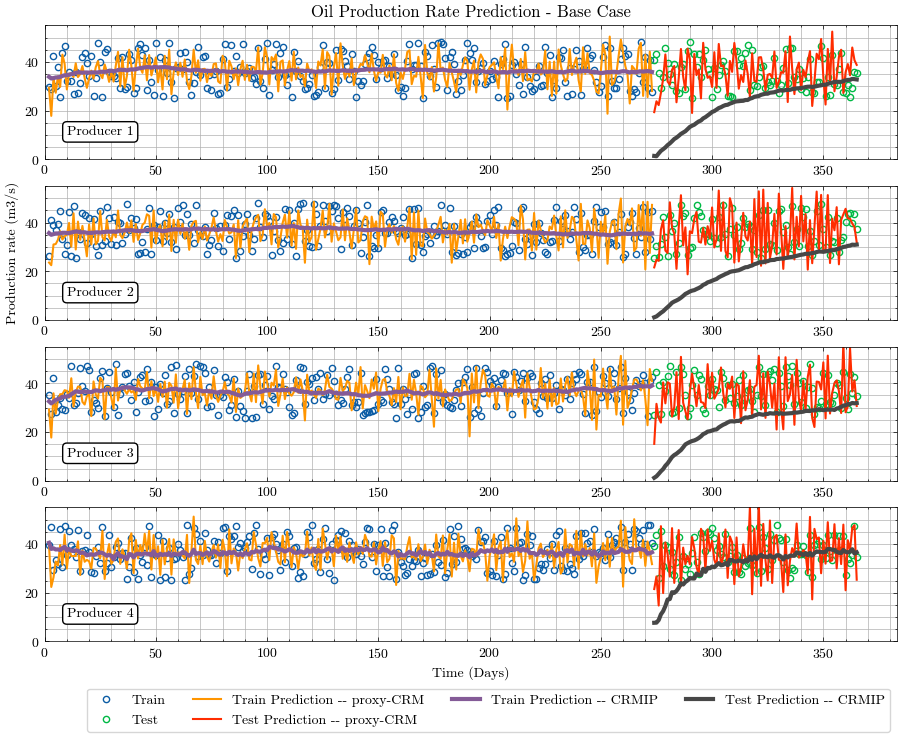

In [20]:
fig, axes = plt.subplots(len(prod.columns), figsize=(11, 8), sharey=True)
for i, p in enumerate(prod):
    axes[i].plot(time_train, oil_prod_train[:,p], label=f"Train", marker="o", markerfacecolor='None', markersize=4.5, ls='None')
    axes[i].plot(time_test, oil_prod_test[:,p], label=f"Test", marker="o", markerfacecolor='None', markersize=4.5, ls='None')

    axes[i].plot(time_train, q_hat_train[:,p], label=f"Train Prediction -- proxy-CRM", lw=1.5)
    axes[i].plot(time_test, q_hat_test[:,p], label=f"Test Prediction -- proxy-CRM", lw=1.5)

    axes[i].plot(time_train, q_hat_crmip[:,p], label=f"Train Prediction -- CRMIP", lw=3)
    axes[i].plot(time_test, q_hat_crmip_test[:,p], label=f"Test Prediction -- CRMIP", lw=3)
    
    axes[i].set(xlim=(0, None), ylim=(0, None))
    axes[i].annotate(f"Producer {p+1}", xy=(10, 10), bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))
    axes[i].grid(visible=True, which='both')
axes[i].set(xlabel="Time (Days)")
axes[1].set(ylabel="Production rate (m3/s)")
axes[0].set(title='Liquid Production Rate Prediction - Base Case')
legend = axes[i].legend(bbox_to_anchor =(1, -0.3), ncol=4, frameon=True)

<h4><b>One Well Shut-In Visualization:</b></h4>

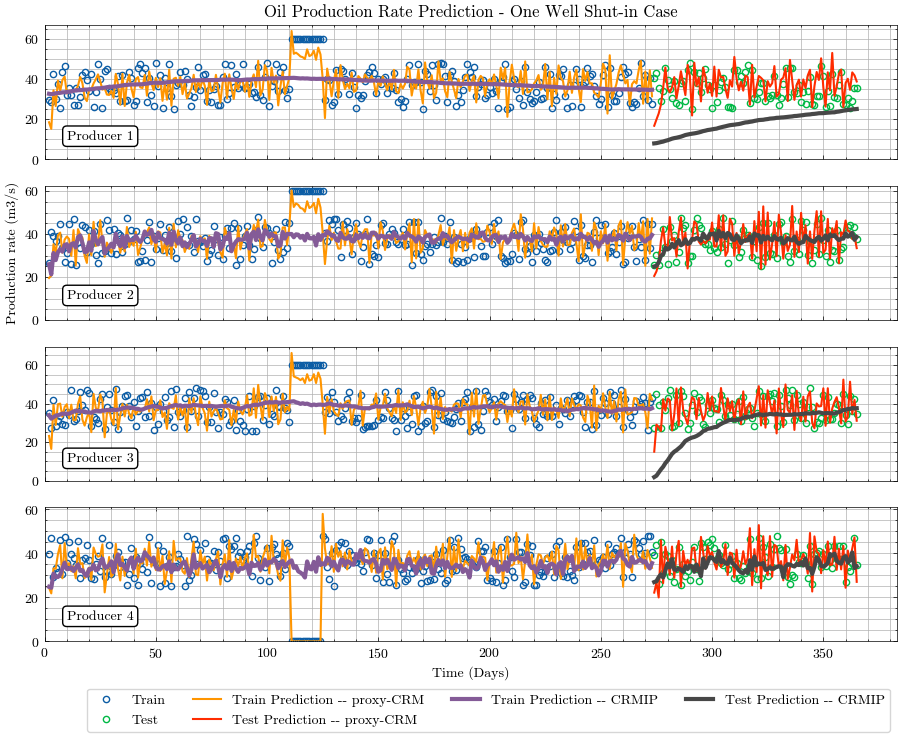

In [21]:
fig, axes = plt.subplots(len(prod.columns), figsize=(11, 8), sharex=True)

for i, p in enumerate(prod):
    axes[i].plot(time_train, oil_prod_shut_in1_train[:,p], label=f"Train", marker="o", markerfacecolor='None', markersize=4.5, ls='None')
    axes[i].plot(time_test, oil_prod_shut_in1_test[:,p], label=f"Test", marker="o", markerfacecolor='None', markersize=4.5, ls='None')

    axes[i].plot(time_train, q_hat_sh_train[:,p], label=f"Train Prediction -- proxy-CRM", lw=1.5)
    axes[i].plot(time_test, q_hat_sh_test[:,p], label=f"Test Prediction -- proxy-CRM", lw=1.5)

    axes[i].plot(time_train, q_hat_sh1_crmip[:,p], label=f"Train Prediction -- CRMIP", lw=3)
    axes[i].plot(time_test, q_hat_sh1_test_crmip[:,p], label=f"Test Prediction -- CRMIP", lw=3)
    
    axes[i].set(xlim=(0, None), ylim=(0, None))
    axes[i].annotate(f"Producer {p+1}", xy=(10, 10), bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))
    axes[i].grid(visible=True, which='both')
axes[i].set(xlabel="Time (Days)")
axes[1].set(ylabel="Production rate (m3/s)")
axes[0].set(title='Liquid Production Rate Prediction - One Well Shut-in Case')

legend = axes[i].legend(bbox_to_anchor =(1, -0.3), ncol=4, frameon=True)

fig = plt.show()

<h4><b>Two Well Shut-In Visualization:</b></h4>

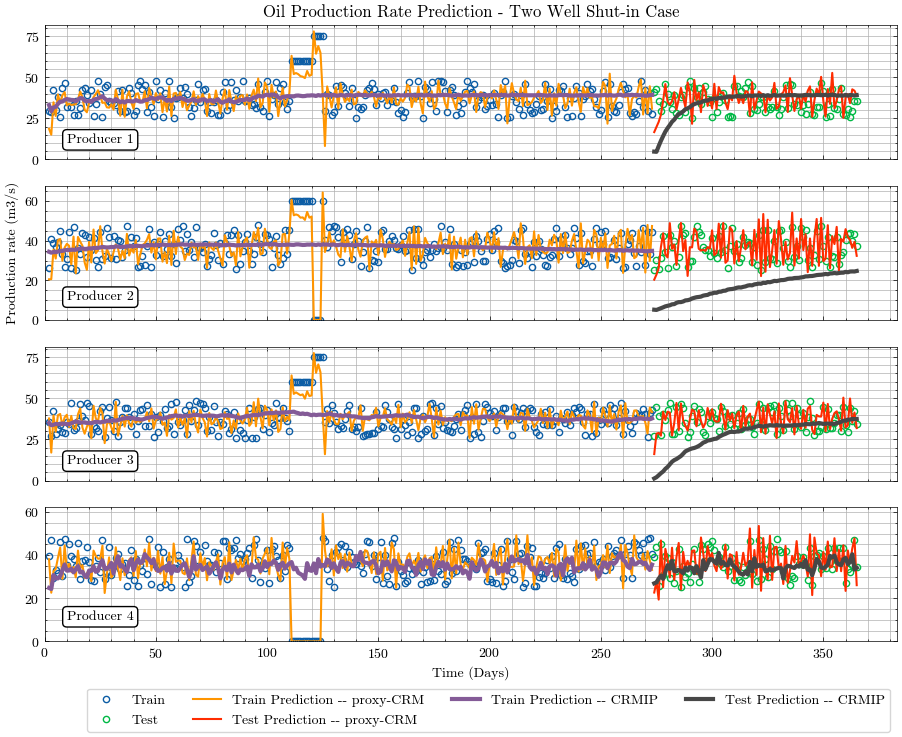

In [22]:
fig, axes = plt.subplots(len(prod.columns), figsize=(11, 8), sharex=True)

for i, p in enumerate(prod):
    axes[i].plot(time_train, oil_prod_shut_in2_train[:,p], label=f"Train", marker="o", markerfacecolor='None', markersize=4.5, ls='None')
    axes[i].plot(time_test, oil_prod_shut_in2_test[:,p], label=f"Test", marker="o", markerfacecolor='None', markersize=4.5, ls='None')
    
    axes[i].plot(time_train, q_hat_sh2_train[:,p], label=f"Train Prediction -- proxy-CRM", lw=1.5)
    axes[i].plot(time_test, q_hat_sh2_test[:,p], label=f"Test Prediction -- proxy-CRM", lw=1.5)

    axes[i].plot(time_train, q_hat_sh2_crmip[:,p], label=f"Train Prediction -- CRMIP", lw=3)
    axes[i].plot(time_test, q_hat_sh2_test_crmip[:,p], label=f"Test Prediction -- CRMIP", lw=3)

    axes[i].set(xlim=(0, None), ylim=(0, None))
    axes[i].annotate(f"Producer {p+1}", xy=(10, 10), bbox=dict(boxstyle='round',pad=0.3, edgecolor='black', facecolor='white'))
    axes[i].grid(visible=True, which='both')
axes[i].set(xlabel="Time (Days)")
axes[1].set(ylabel="Production rate (m3/s)")
axes[0].set(title='Liquid Production Rate Prediction - Two Well Shut-in Case')

legend = axes[i].legend(bbox_to_anchor =(1, -0.3), ncol=4, frameon=True)

fig = plt.show()

<h3><b>4. Connectivity (lambda_ip) Results</b></h3>
<p>The heart of this project is the the <b>lambda_ip</b> parameter after all, so let's also visualize them in DataFrame.</p>

In [23]:
# get directory
import os
parentDir = os.path.abspath(os.getcwd())

<h4><b>Base Case Lambda_ip:</b></h4>

In [24]:
connectivity = pd.DataFrame(
    base_pcrm.lambda_ip.reshape(4,5),
    index=prod.columns.rename("Producer"),
    columns=inj.columns.rename("Injector"),
)
conn_table = connectivity.T.style.highlight_max(color='blue').format("{:.2}")

conn_table.to_excel(os.path.join(parentDir, 'data\\results', 'base_case_lambda_ip.xlsx')) # exporting results to excel files

conn_table

Producer,0,1,2,3
Injector,,,,
0,0.17,0.17,0.16,0.18
1,0.19,0.18,0.17,0.19
2,0.19,0.18,0.2,0.17
3,0.16,0.18,0.18,0.17
4,0.15,0.16,0.15,0.16


<h4><b>One Well Shut-In Case Lambda_ip:</b></h4>

In [25]:
shut_in_connectivity = pd.DataFrame(
    shut_in1_test.lambda_ip.reshape(4,5),
    index=prod.columns.rename("Producer"),
    columns=inj.columns.rename("Injector"),
)

conn_table_sh1 = shut_in_connectivity.T.style.highlight_max(color='blue').format("{:.2}")

conn_table_sh1.to_excel(os.path.join(parentDir, 'data\\results', '1shutin_lambda_ip.xlsx'))

conn_table_sh1

Producer,0,1,2,3
Injector,,,,
0,0.15,0.17,0.096,0.11
1,0.1,0.066,0.049,0.077
2,0.5,0.5,0.53,0.57
3,0.064,0.082,0.12,0.051
4,0.053,0.054,0.058,0.04


<h4><b>Two Well Shut-In Case Lambda_ip</b></h4>

In [26]:
shut_in_connectivity2 = pd.DataFrame(
    shut_in2_test.lambda_ip.reshape(4,5),
    index=prod.columns.rename("Producer"),
    columns=inj.columns.rename("Injector"),
)
conn_table_sh2 = shut_in_connectivity.T.style.highlight_max(color='blue').format("{:.2}")

conn_table_sh2.to_excel(os.path.join(parentDir, 'data\\results', '2shutin_lambda_ip.xlsx')) # exporting results to excel files

conn_table_sh2

Producer,0,1,2,3
Injector,,,,
0,0.15,0.17,0.096,0.11
1,0.1,0.066,0.049,0.077
2,0.5,0.5,0.53,0.57
3,0.064,0.082,0.12,0.051
4,0.053,0.054,0.058,0.04


<h3><b>5. RMSE Calculation</b></h3>
<p>To test the accuracy of our model, we will use RMSE (Root Mean Square Error).</p>

<h4><b>5A. RMSE of Proxy-CRM:</b></h4>
<p>In order: Base Case - One Well Case - Two Well Case</p>

In [27]:
def rmse(test, pred, test_sh, pred_sh, test_sh2, pred_sh2):
  original_rmse = np.sqrt(((test-pred)**2/len(test)).sum())
  shut_in_rmse = np.sqrt(((test_sh-pred_sh)**2/len(test_sh)).sum())
  shut_in_rmse2 = np.sqrt(((test_sh2-pred_sh2)**2/len(test_sh)).sum())
  return original_rmse, shut_in_rmse, shut_in_rmse2

result=[]
for j in range(prod.shape[1]):
  result.append(np.array(rmse(oil_prod_test[:,j], q_hat_test[:,j], oil_prod_shut_in1_test[:,j], q_hat_sh_test[:,j], oil_prod_shut_in2_test[:,j], q_hat_sh2_test[:,j])))

print(f'Test Prediction RMSE of proxy-CRM:\n{np.array(result)}')

Test Prediction RMSE of proxy-CRM:
[[6.78142905 6.776938   6.64669071]
 [6.1806416  4.83283071 4.96792391]
 [6.120309   4.74561032 4.51334237]
 [6.35117712 5.0710641  5.19914005]]


In [28]:
result=[]
for j in range(prod.shape[1]):
  result.append(np.array(rmse(oil_prod_train[:,j], q_hat_train[:,j], oil_prod_shut_in1_train[:,j], q_hat_sh_train[:,j], oil_prod_shut_in2_train[:,j], q_hat_sh2_train[:,j])))

print(f'Train Prediction RMSE of proxy-CRM:\n{np.array(result)}')

Train Prediction RMSE of proxy-CRM:
[[5.35424327 5.8528704  6.26403021]
 [5.12021835 5.52297644 5.23294408]
 [5.07296409 5.41145696 5.83159757]
 [5.04786939 5.30125912 5.09419148]]


<h4><b>5B. RMSE of CRMIP:</b></h4>
<p>In order: Base Case - One Well Case - Two Well Case</p>

In [29]:
result=[]
for j in range(prod.shape[1]):
  result.append(np.array(rmse(oil_prod_test[:,j], q_hat_crmip_test[:,j], oil_prod_shut_in1_test[:,j], q_hat_sh1_test_crmip[:,j], oil_prod_shut_in1_test[:,j], q_hat_sh1_test_crmip[:,j])))

print(f'Test Prediction RMSE of CRMIP:\n{np.array(result)}')

Test Prediction RMSE of CRMIP:
[[17.2769469  19.37111089 19.37111089]
 [18.83101799  6.56267699  6.56267699]
 [17.28098207 13.47608741 13.47608741]
 [10.62965074  6.4594683   6.4594683 ]]


In [30]:
result=[]
for j in range(prod.shape[1]):
  result.append(np.array(rmse(oil_prod_train[:,j], q_hat_crmip[:,j], oil_prod_shut_in1_train[:,j], q_hat_sh1_crmip[:,j], oil_prod_shut_in2_train[:,j], q_hat_sh2_crmip[:,j])))

print(f'Train Prediction RMSE of CRMIP:\n{np.array(result)}')

Train Prediction RMSE of CRMIP:
[[ 6.66939074  8.10862358  9.31007973]
 [ 6.34250983  8.3542212   8.83909131]
 [ 6.18427409  7.85752822  8.77949835]
 [ 6.40503782 10.42395819 10.42344824]]


<h3> <b>Another Bonus: Visualization of Lambda_ip per timestep</b> </h3>
<p>This is to turn the lambda_ip into timesteps and show its behavior. In this case the data will be turned into graphs through excel.</p>

In [31]:
n_prod = prod_shut_in2_train.shape[1]
n_inj = inj_train.shape[1]
n_t = prod.values.shape[0]

lambda_ip = np.tile(shut_in2_test.lambda_ip.reshape((n_prod,n_inj)), (n_t,1,1))

mask = pCRM.sh_mask(prod_shut_in2_train)
result = pCRM.calc_sh_mask(lambda_ip, mask)

print(result[:,3,:])

[[0.09531767 0.09490483 0.5201738  0.07478066 0.06274558]
 [0.09531767 0.09490483 0.5201738  0.07478066 0.06274558]
 [0.09531767 0.09490483 0.5201738  0.07478066 0.06274558]
 [0.09531767 0.09490483 0.5201738  0.07478066 0.06274558]
 [0.09531767 0.09490483 0.5201738  0.07478066 0.06274558]
 [0.09531767 0.09490483 0.5201738  0.07478066 0.06274558]
 [0.09531767 0.09490483 0.5201738  0.07478066 0.06274558]
 [0.09531767 0.09490483 0.5201738  0.07478066 0.06274558]
 [0.09531767 0.09490483 0.5201738  0.07478066 0.06274558]
 [0.09531767 0.09490483 0.5201738  0.07478066 0.06274558]
 [0.09531767 0.09490483 0.5201738  0.07478066 0.06274558]
 [0.09531767 0.09490483 0.5201738  0.07478066 0.06274558]
 [0.09531767 0.09490483 0.5201738  0.07478066 0.06274558]
 [0.09531767 0.09490483 0.5201738  0.07478066 0.06274558]
 [0.09531767 0.09490483 0.5201738  0.07478066 0.06274558]
 [0.09531767 0.09490483 0.5201738  0.07478066 0.06274558]
 [0.09531767 0.09490483 0.5201738  0.07478066 0.06274558]
 [0.09531767 0